# Group 16: SIT307 Data Mining Group Project

Dataset Selected/used: <b>COVID-19 World Vaccination Progress</b>

Found at: https://www.kaggle.com/gpreda/covid-world-vaccination-progress

Collected by: <b>Gabriel Preda</b>

Updated: <b>Daily</b>

Date of download: <b>15th April 2021</b>

Imported libraries used

In [1]:
# import libraries used
import numpy as np
import pandas as pd
pd.set_option('precision', 2)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

## Data Cleansing
Get some information about the data set such as what are the columns, the data type in those columns and the number of columns and rows

In [2]:
# read in CSV file to vaccination and preview head
vaccination = pd.read_csv('data/country_vaccinations.csv')
vaccination.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [3]:
# See what the column headings are
vaccination.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [4]:
# and the data type stored in those columns
vaccination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11364 entries, 0 to 11363
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              11364 non-null  object 
 1   iso_code                             11364 non-null  object 
 2   date                                 11364 non-null  object 
 3   total_vaccinations                   6756 non-null   float64
 4   people_vaccinated                    6091 non-null   float64
 5   people_fully_vaccinated              4362 non-null   float64
 6   daily_vaccinations_raw               5646 non-null   float64
 7   daily_vaccinations                   11167 non-null  float64
 8   total_vaccinations_per_hundred       6756 non-null   float64
 9   people_vaccinated_per_hundred        6091 non-null   float64
 10  people_fully_vaccinated_per_hundred  4362 non-null   float64
 11  daily_vaccinations_per_milli

In [5]:
# and the shape of the data set
vaccination.shape

(11364, 15)

Check categorical columns for spelling errors and misprints/typos:

In [6]:
# check the unique values of country
vaccination.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Cambodia', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Chile', 'China', 'Colombia',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Estonia',
       'Eswatini', 'Faeroe Islands', 'Falkland Islands', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guatemala',
       'Guernsey', 'Guinea', 'Guyana', 'Honduras', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran'

In [7]:
# check the unique values of ISO code
vaccination.iso_code.unique()

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM',
       'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL',
       'BLZ', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR',
       'KHM', 'CAN', 'CPV', 'CYM', 'CHL', 'CHN', 'COL', 'CRI', 'CIV',
       'HRV', 'CYP', 'CZE', 'DNK', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV',
       'OWID_ENG', 'GNQ', 'EST', 'SWZ', 'FRO', 'FLK', 'FIN', 'FRA', 'GAB',
       'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GTM',
       'GGY', 'GIN', 'GUY', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN',
       'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JEY',
       'JOR', 'KAZ', 'KEN', 'OWID_KOS', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN',
       'LIE', 'LTU', 'LUX', 'MAC', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT',
       'MRT', 'MUS', 'MEX', 'MDA', 'MCO', 'MNG', 'MNE', 'MSR', 'MAR',
       'MOZ', 'MMR', 'NAM', 'NPL', 'NLD', 'NZL', 'NGA', 'MKD', 'OWID_CYN',
       'OWID_NIR', 'NOR', 'OMN', 'PAK', 'PSE', 'PAN', 'PNG', 'PRY', 'PER',


In [8]:
# check the unique values of vaccine used in the country
vaccination.vaccines.unique()

array(['Oxford/AstraZeneca', 'Pfizer/BioNTech, Sinovac', 'Sputnik V',
       'Pfizer/BioNTech',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Pfizer/BioNTech',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech', 'Sinovac',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V',
       'Oxford/AstraZeneca, Sinovac',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac',
       'Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac',
       'Oxford/AstraZeneca, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac',
       'Sinopharm/Beijing', 'Moderna, Pfizer/BioNTech',
       'Moderna, Oxford/AstraZeneca',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Covaxin, Oxford/AstraZeneca',
       'Pfizer/BioNTech, Sinopharm/Beijing',
       'Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Si

Source name and source website will not be used in data analysis, therefore there is no need to check for misprints

No errors or misprints/typos found therefore no cleaning is required here.

Check numerical columns for unreasonable minimum values:

In [9]:
# set pandas to float format to show full numbers
pd.set_option('float_format', '{:f}'.format)

# descriptive statistical values showing mean and five number summary
vaccination.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,6756.000000,6091.000000,4362.000000,5646.000000,11167.000000,6756.000000,6091.000000,4362.000000,11167.000000
mean,3770686.125518,2662908.245772,1216657.215956,121580.530464,70694.528790,12.578215,9.460942,4.536311,2813.774156
std,14580169.439103,9335192.557808,5044791.424996,450796.086742,304626.841394,20.648919,13.848831,9.080818,4934.979742
min,0.000000,0.000000,1.000000,-29286.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52868.000000,50046.000000,22609.750000,3181.250000,926.500000,1.000000,0.950000,0.490000,327.000000
50%,355014.500000,297899.000000,152502.500000,15463.500000,6001.000000,4.860000,3.860000,1.720000,1396.000000
75%,1641988.250000,1221800.000000,586143.750000,60260.000000,26703.500000,15.070000,11.470000,4.577500,3513.000000
max,189692045.000000,120848490.000000,74066085.000000,7185000.000000,5190143.000000,190.910000,102.490000,88.420000,118759.000000


No negative values found. However an unreasonable value was found with one country reporting 102.5 people vaccinated per hundred. This isn't possible so will be removed from the data set.

<b>Note:</b> one country has 190 total vaccinations per hundred. While this seems incorrect, this column registers single doses and as people require 2 doses this 190 is correct. Over 200 would be an impossible value.


In [10]:
# indexes of people vaccinated per hundred over 100 people
impossible_idx = vaccination[vaccination['people_vaccinated_per_hundred'] > 100 ].index

# Delete these row indexes from dataFrame
vaccination = vaccination.drop(impossible_idx)

In [11]:
# descriptive statistical values showing people_vaccinated_per_hundred max changing
vaccination['people_vaccinated_per_hundred'].describe()

count   6089.000000
mean       9.430655
std       13.749865
min        0.000000
25%        0.950000
50%        3.850000
75%       11.450000
max       99.310000
Name: people_vaccinated_per_hundred, dtype: float64

Test the number of null values per column to see which ones have high missing value ratios. However, don't remove the row as the row could contain valuable information to a different column. Missing value removal will be done when the column wants to be used.

In [12]:
# get the count of null values in each column
vaccination.isnull().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     4608
people_vaccinated                      5273
people_fully_vaccinated                7002
daily_vaccinations_raw                 5718
daily_vaccinations                      197
total_vaccinations_per_hundred         4608
people_vaccinated_per_hundred          5273
people_fully_vaccinated_per_hundred    7002
daily_vaccinations_per_million          197
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

Transform date data type to date time instead of object. 

In [13]:
# convert data format to day, month, year
vaccination['date'] = pd.to_datetime(vaccination['date'], format="%Y/%m/%d", errors='raise')

# check data type of date is now date time
vaccination.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11362 entries, 0 to 11363
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              11362 non-null  object        
 1   iso_code                             11362 non-null  object        
 2   date                                 11362 non-null  datetime64[ns]
 3   total_vaccinations                   6754 non-null   float64       
 4   people_vaccinated                    6089 non-null   float64       
 5   people_fully_vaccinated              4360 non-null   float64       
 6   daily_vaccinations_raw               5644 non-null   float64       
 7   daily_vaccinations                   11165 non-null  float64       
 8   total_vaccinations_per_hundred       6754 non-null   float64       
 9   people_vaccinated_per_hundred        6089 non-null   float64       
 10  people_ful

#### Z-Scores
Check the numerical column Z-scores to determine outliers

In [14]:
# take just numerical columns and determine Z-score in new data frame called z-scores
z_score_cols = vaccination[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations_raw',
                          'daily_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
                          'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million']].copy()

z_scores = pd.DataFrame(stats.zscore(z_score_cols, nan_policy='omit'))

In [15]:
# display Z-Score descriptive statistics to determine average, max, min, lower and upper quartile of Z-scores
z_scores.describe()

,0,1,2,3,4,5,6,7,8
count,6754.000000,6089.000000,4360.000000,5644.000000,11165.000000,6754.000000,6089.000000,4360.000000,11165.000000
mean,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000
std,1.000074,1.000082,1.000115,1.000089,1.000045,1.000074,1.000082,1.000115,1.000045
min,-0.258676,-0.285328,-0.241254,-0.334737,-0.232101,-0.613296,-0.685929,-0.505216,-0.570036
25%,-0.255050,-0.279964,-0.236777,-0.262713,-0.229055,-0.564333,-0.616832,-0.450178,-0.503773
50%,-0.234301,-0.253415,-0.210937,-0.235451,-0.212390,-0.375336,-0.405903,-0.312021,-0.287355
75%,-0.146050,-0.154400,-0.125060,-0.136070,-0.144440,0.123965,0.146875,0.008099,0.141428
max,12.750763,12.659252,14.438943,15.667485,16.804925,8.544755,6.537281,9.349971,23.495122


In [16]:
z_scores[z_scores > np.abs(3.0)].count()

0    106
1    104
2     53
3    112
4    161
5    152
6    128
7    112
8    141
dtype: int64

As there are a large number of high z scores (greater than 3) due to different countries vaccination capabilities at different stages of their role outs, no outliers will be removed as this is valuable data and would lose a large number of data records.

#### Duplicate Rows
Duplicate rows were determined in order to remove these so as not to provide misleading analysis

In [17]:
# test for duplicate rows
vaccination.duplicated().sum()

0

No duplicate rows found

#### Feature Selection
Filter stratergy was used to remove columns with low information gain and duplication that would not be neccisary for any of our analysis

In [18]:
# drop source name, source website, raw daily vaccinations and ISO codes from dataframe to leave a clean and smaller dataset
vaccination = vaccination.drop(columns=['source_name', 'source_website', 'iso_code', 'daily_vaccinations_raw'])

## Exploratory Data Analysis
Exploring the data in different ways. First some correlations were identified then many experiments were performed but only select few have been included so as not to clog code file. The following questions were explored here: 

1. Which country has vaccinated the most people and what vaccine have they used?
2. Which country has fully vaccinated the most people?
3. The most vaccines administered in a single day, and by which country?
4. Which country has adminisered at least one dose to the largest percentage of their population?
5. What vaccines are used in which countries?
6. Which vaccines is the most used around the globe?

Some further exploring was done to find interesting patterns by looking at various top and bottom 10 countries in different categories such as total vaccinations and largest percentage of population vaccinated.

Finally, a line graph was plotted to show the variance in vaccination rates of some different countries.

#### Pearson Correlation
Pearson Correlation was used to determine correlation between different columns

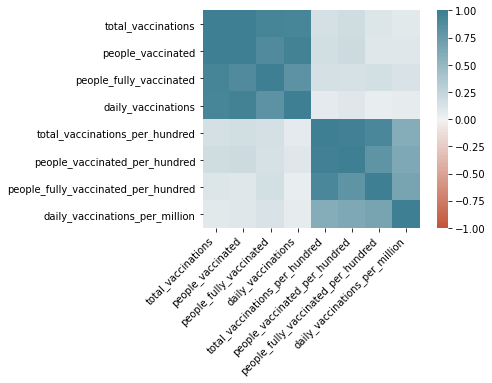

In [19]:
# determine pearson correlation and display as heat map
corr = vaccination.corr(method='pearson')

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# source from https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

Descriptive statistics were able to be used to determine some interesting information such as country who has administered the most vaccines, the highest number of fully vaccinated people, the most vaccines administered on a single day, the country that has administered at least one dose to the largest percentage of their population and the most used vaccine around the world.

#### Most Vaccines Administers

In [20]:
# determine the index that contains the highest total vaccination value
most_vacs = vaccination['total_vaccinations'].idxmax()

In [21]:
# determine the country, date and number of people vaccinated based on the highest total vaccination
country_most, date_recorded, total_vaccinations_most = vaccination.loc[most_vacs][['country', 'date', 'total_vaccinations']]

In [22]:
# determine all the vaccines that country has used
vaccines_used = vaccination.loc[vaccination['country'] == country_most, 'vaccines']

In [23]:
print(country_most, 'has administer the most vaccinations as of', date_recorded.strftime("%d %b %Y"), 'with a total of', 
      int(total_vaccinations_most), 'using', vaccines_used.unique(), 'vaccines.')

United States has administer the most vaccinations as of 12 Apr 2021 with a total of 189692045 using ['Johnson&Johnson, Moderna, Pfizer/BioNTech'] vaccines.


#### Fully Vaccinated the Most People

In [24]:
# determine the index that contains the highest total vaccination value and display
most_full_vacs = vaccination['people_fully_vaccinated'].idxmax()

In [25]:
# show the country, date and number of people vaccinated based on the highest total vaccination
country_fully, date_fully, people_full_vacc = vaccination.loc[most_full_vacs][['country', 'date', 'people_fully_vaccinated']]
print(country_fully, 'has the most fully vaccinated people as of', date_fully.strftime("%d %b %Y"), 'with a total of', 
      int(people_full_vacc))

United States has the most fully vaccinated people as of 12 Apr 2021 with a total of 74066085


#### Most Vaccines Administered in SIngle Day

In [26]:
most_vaccines_daily = vaccination['daily_vaccinations'].idxmax()
most_vaccines_daily

2211

In [27]:
country_most_day, date_recorded_day, most_vaccinations_admin_daily = vaccination.loc[most_vaccines_daily][['country', 'date', 'daily_vaccinations']]

In [28]:
print(country_most_day, 'has administered the most vaccinations on a single day on', date_recorded_day.strftime("%d %b %Y"), 
      'with a total of', int(most_vaccinations_admin_daily))

China has administered the most vaccinations on a single day on 02 Apr 2021 with a total of 5190143


#### Country That Has Administered at least One Dose to the Largest Percentage of Their Population

In [29]:
most_one_dose = vaccination['people_vaccinated_per_hundred'].idxmax()
most_one_dose

4017

In [30]:
country_most_one_dose, date_recorded_day, most_admin_one_dose = vaccination.loc[most_one_dose][['country', 'date', 'people_vaccinated_per_hundred']]

In [31]:
print(country_most_one_dose, 'has administered largest percentange of their population atleast one dose by', 
      date_recorded_day.strftime("%d %b %Y"), 'with a total of', int(most_admin_one_dose), '%')

Gibraltar has administered largest percentange of their population atleast one dose by 09 Apr 2021 with a total of 99 %


#### Most used vaccine

In [32]:
# Most used vaccine
# taking just the country and vaccine
most_used_vac = vaccination[['country','vaccines']]

# check worked correctly
most_used_vac.columns

Index(['country', 'vaccines'], dtype='object')

In [33]:
# concat multiple vaccines contained by spliting at commas
most_used_vac = pd.concat([most_used_vac['country'], most_used_vac['vaccines'].str.split(', ', expand=True)], axis=1)
most_used_vac

,country,0,1,2,3,4
0,Afghanistan,Oxford/AstraZeneca,None,None,None,None
1,Afghanistan,Oxford/AstraZeneca,None,None,None,None
2,Afghanistan,Oxford/AstraZeneca,None,None,None,None
3,Afghanistan,Oxford/AstraZeneca,None,None,None,None
4,Afghanistan,Oxford/AstraZeneca,None,None,None,None
...,...,...,...,...,...,...
11359,Zimbabwe,Sinopharm/Beijing,None,None,None,None
11360,Zimbabwe,Sinopharm/Beijing,None,None,None,None
11361,Zimbabwe,Sinopharm/Beijing,None,None,None,None
11362,Zimbabwe,Sinopharm/Beijing,None,None,None,None


In [34]:
# melt the different columns into a single one with country
most_used_vac = most_used_vac.melt(id_vars=['country'])
most_used_vac

,country,variable,value
0,Afghanistan,0,Oxford/AstraZeneca
1,Afghanistan,0,Oxford/AstraZeneca
2,Afghanistan,0,Oxford/AstraZeneca
3,Afghanistan,0,Oxford/AstraZeneca
4,Afghanistan,0,Oxford/AstraZeneca
...,...,...,...
56805,Zimbabwe,4,None
56806,Zimbabwe,4,None
56807,Zimbabwe,4,None
56808,Zimbabwe,4,None


In [35]:
# remove variable column
most_used_vac.drop('variable', axis=1, inplace=True)

# check number of null values in dataframe
most_used_vac.isnull().sum()

country        0
value      33397
dtype: int64

In [36]:
# show columns and head
most_used_vac.columns = ['country','vaccines']
most_used_vac.head()

,country,vaccines
0,Afghanistan,Oxford/AstraZeneca
1,Afghanistan,Oxford/AstraZeneca
2,Afghanistan,Oxford/AstraZeneca
3,Afghanistan,Oxford/AstraZeneca
4,Afghanistan,Oxford/AstraZeneca


In [37]:
# display the number of unique vaccine entries and what they are
print(len(most_used_vac.vaccines.unique()))
most_used_vac.vaccines.unique()

11


array(['Oxford/AstraZeneca', 'Pfizer/BioNTech', 'Sputnik V', 'Moderna',
       'Sinovac', 'Sinopharm/Beijing', 'Covaxin', 'EpiVacCorona',
       'Johnson&Johnson', None, 'Sinopharm/Wuhan'], dtype=object)

In [38]:
# get information from data frame
most_used_vac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56810 entries, 0 to 56809
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   country   56810 non-null  object
 1   vaccines  23413 non-null  object
dtypes: object(2)
memory usage: 887.8+ KB


In [39]:
# drop all rows containing null values as any country that only uses one
# vaccine will have many NA values
most_used_vac = most_used_vac.dropna(axis=0)

# check all null values been removed
most_used_vac.isnull().sum()

country     0
vaccines    0
dtype: int64

In [40]:
# check unique vaccines after none has been removed
print(len(most_used_vac.vaccines.unique()))

10


In [41]:
# create a summary grouping countries by unique vaccines
summary = most_used_vac.groupby('vaccines')['country'].agg(['unique'])
# display summary
summary

,unique
vaccines,
Covaxin,[India]
EpiVacCorona,[Russia]
Johnson&Johnson,"[South Africa, United States]"
Moderna,"[Austria, Belgium, Bulgaria, Canada, Croatia, ..."
Oxford/AstraZeneca,"[Afghanistan, Angola, Anguilla, Antigua and Ba..."
Pfizer/BioNTech,"[Albania, Andorra, Bermuda, Cayman Islands, Ch..."
Sinopharm/Beijing,"[China, Equatorial Guinea, Gabon, Kyrgyzstan, ..."
Sinopharm/Wuhan,"[China, United Arab Emirates]"
Sinovac,"[Azerbaijan, Albania, Brazil, Chile, Colombia,..."


In [42]:
# add a number of countries column to data frame
summary['nCountry'] = summary.unique.str.len()
# display summary
summary

,unique,nCountry
vaccines,,
Covaxin,[India],1
EpiVacCorona,[Russia],1
Johnson&Johnson,"[South Africa, United States]",2
Moderna,"[Austria, Belgium, Bulgaria, Canada, Croatia, ...",36
Oxford/AstraZeneca,"[Afghanistan, Angola, Anguilla, Antigua and Ba...",118
Pfizer/BioNTech,"[Albania, Andorra, Bermuda, Cayman Islands, Ch...",85
Sinopharm/Beijing,"[China, Equatorial Guinea, Gabon, Kyrgyzstan, ...",27
Sinopharm/Wuhan,"[China, United Arab Emirates]",2
Sinovac,"[Azerbaijan, Albania, Brazil, Chile, Colombia,...",19


In [43]:
# display number of countries identified
summary.nCountry.sum()

315

In [44]:
# work out the percentage of countries that use each vaccine and add new column
summary = summary.assign(pCountry = lambda x: ((x['nCountry'])/summary.nCountry.sum()) * 100)
# display
summary

,unique,nCountry,pCountry
vaccines,,,
Covaxin,[India],1,0.317460
EpiVacCorona,[Russia],1,0.317460
Johnson&Johnson,"[South Africa, United States]",2,0.634921
Moderna,"[Austria, Belgium, Bulgaria, Canada, Croatia, ...",36,11.428571
Oxford/AstraZeneca,"[Afghanistan, Angola, Anguilla, Antigua and Ba...",118,37.460317
Pfizer/BioNTech,"[Albania, Andorra, Bermuda, Cayman Islands, Ch...",85,26.984127
Sinopharm/Beijing,"[China, Equatorial Guinea, Gabon, Kyrgyzstan, ...",27,8.571429
Sinopharm/Wuhan,"[China, United Arab Emirates]",2,0.634921
Sinovac,"[Azerbaijan, Albania, Brazil, Chile, Colombia,...",19,6.031746


In [45]:
# sort summary with most used vaccine first
summary.sort_values('nCountry', ascending=False)

,unique,nCountry,pCountry
vaccines,,,
Oxford/AstraZeneca,"[Afghanistan, Angola, Anguilla, Antigua and Ba...",118,37.460317
Pfizer/BioNTech,"[Albania, Andorra, Bermuda, Cayman Islands, Ch...",85,26.984127
Moderna,"[Austria, Belgium, Bulgaria, Canada, Croatia, ...",36,11.428571
Sinopharm/Beijing,"[China, Equatorial Guinea, Gabon, Kyrgyzstan, ...",27,8.571429
Sputnik V,"[Algeria, Armenia, Belarus, Guinea, Iran, Kaza...",24,7.619048
Sinovac,"[Azerbaijan, Albania, Brazil, Chile, Colombia,...",19,6.031746
Johnson&Johnson,"[South Africa, United States]",2,0.634921
Sinopharm/Wuhan,"[China, United Arab Emirates]",2,0.634921
Covaxin,[India],1,0.317460


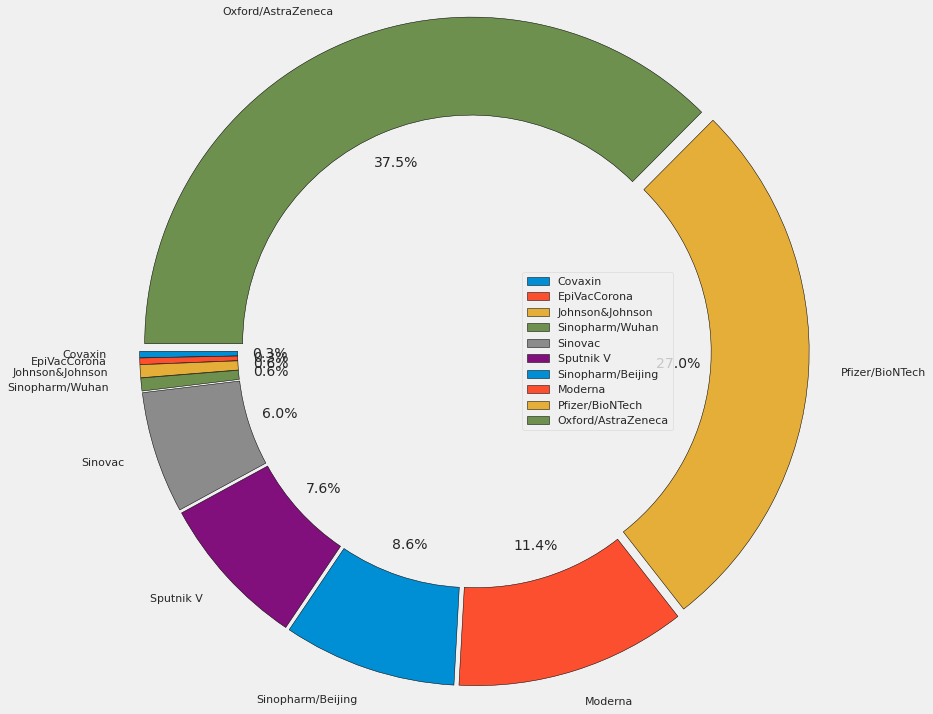

In [81]:
# create a pie chart to show the use of each vaccine
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,7))
labels = summary.index

plt.pie(summary.pCountry, labels=labels, explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], 
        wedgeprops={'edgecolor':'black', 'width':0.6}, startangle=-180, autopct='%1.1F%%', radius=2)

plt.legend(loc='right')
plt.show()

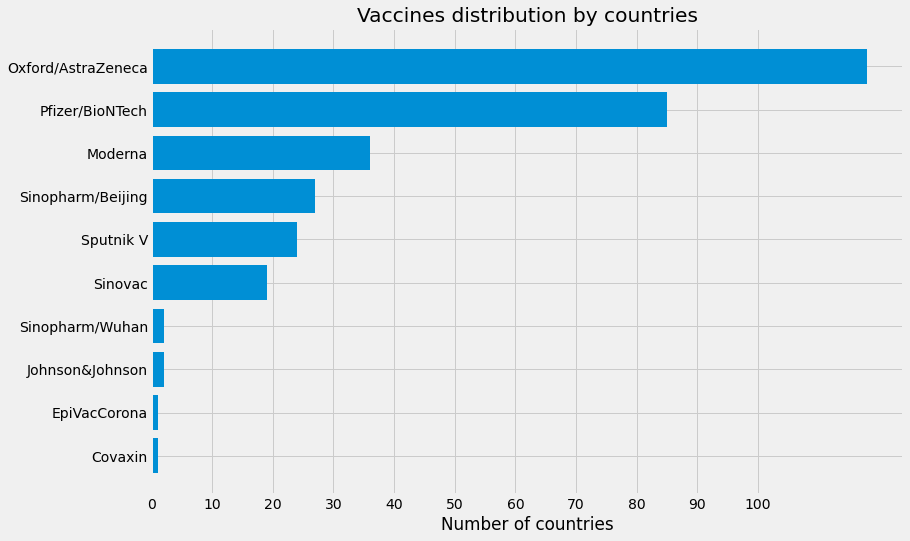

In [47]:
# create a horisontal bar graph to show the number of countries using a given vaccine
summary = summary.sort_values('nCountry')

plt.figure(figsize=(12,8))
plt.title("Vaccines distribution by countries")
plt.style.use('fivethirtyeight')
plt.xlabel('Number of countries')
plt.xticks(np.arange(0,110,10))

plt.barh(summary.index, summary.nCountry)
plt.show()

#### Top 10 Total Vaccinations

In [48]:
top_vac = vaccination.sort_values(['total_vaccinations'], ascending=False).drop_duplicates(subset=['country'], keep='first').groupby('country').head().head(10)
top_vac[['country','total_vaccinations']]

,country,total_vaccinations
11064,United States,189692045.000000
2221,China,171928000.000000
4835,India,108533085.000000
10950,United Kingdom,39846781.000000
3225,England,33445922.000000
1588,Brazil,27432994.000000
10601,Turkey,18728978.000000
3885,Germany,18684873.000000
4926,Indonesia,15602574.000000
3697,France,14536712.000000


#### Bottom 10 Total Vaccinations

In [49]:
bottom_vac = vaccination.sort_values(['total_vaccinations'], ascending=False).drop_duplicates(subset=['country'], keep='first').groupby('country').tail().tail(10).sort_values(by='total_vaccinations', ascending=True)
bottom_vac[['country','total_vaccinations']]

,country,total_vaccinations
8032,Papua New Guinea,250.000000
499,Armenia,565.000000
6538,Mali,643.000000
7043,Montserrat,1306.000000
9760,Solomon Islands,2000.000000
5892,Kyrgyzstan,2100.000000
1888,Cape Verde,2184.000000
1593,Brunei,2323.000000
10331,Syria,2500.000000
5784,Kosovo,2500.000000


#### Top 10 Percentage of Population Vaccinated

In [50]:
top_perc_vac = vaccination.sort_values(['people_vaccinated_per_hundred'], ascending=False).drop_duplicates(subset=['country'], keep='first').groupby('country').head().head(10)
top_perc_vac[['country','people_vaccinated_per_hundred']]

,country,people_vaccinated_per_hundred
4017,Gibraltar,99.310000
3488,Falkland Islands,74.790000
9431,Seychelles,66.600000
1352,Bhutan,61.640000
5316,Israel,61.570000
5201,Isle of Man,54.390000
8815,Saint Helena,51.180000
11309,Wales,50.360000
6534,Maldives,49.660000
9196,Scotland,48.850000


#### Bottom 10 Percentage of Population Vaccinated

In [51]:
bottom_perc_vac = vaccination.sort_values(['people_vaccinated_per_hundred'], ascending=False).drop_duplicates(subset=['country'], keep='first').dropna(how='any').groupby('country').tail().tail(10).sort_values(by='people_vaccinated_per_hundred', ascending=True)
bottom_perc_vac[['country','people_vaccinated_per_hundred']]

,country,people_vaccinated_per_hundred
88,Albania,0.210000
9459,Sierra Leone,0.470000
9813,South Africa,0.490000
4487,Honduras,0.560000
8078,Paraguay,0.640000
10396,Thailand,0.710000
4289,Guatemala,0.770000
3242,Equatorial Guinea,0.790000
5505,Japan,0.870000
10753,Ukraine,0.890000


#### Vaccination Rates of Various Countries Based on Total Vaccinations

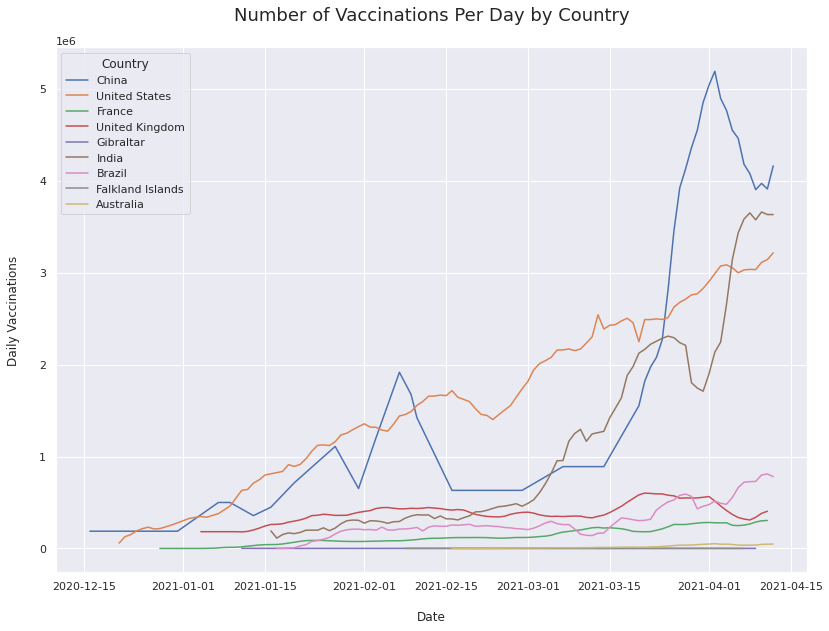

In [52]:
# create a plot using sns

# set style to whitegrid
sns.axes_style("whitegrid")
# set graph size
sns.set(rc={'figure.figsize':(12,9)})

# determine countries to plot
countries = ['United States','United Kingdom','Australia','India','China','France', 'Brazil', 'Gibraltar', 'Falkland Islands']

# create line plot using date on the x axis and number of daily vaccines on y, with data being country that is in the 
#list sorted by date, and coloured by country
graph = sns.lineplot(x="date", y="daily_vaccinations", data=vaccination[vaccination['country'].isin(countries)]
                     .sort_values(by="date"), hue='country')

plt.title("Number of Vaccinations Per Day by Country\n", size=18)
plt.xlabel("\nDate")
plt.ylabel("Daily Vaccinations\n")
plt.legend(title='Country')

# show plot
plt.show()

#### Vaccination Rates of Various Countries Based on People Per Hundred

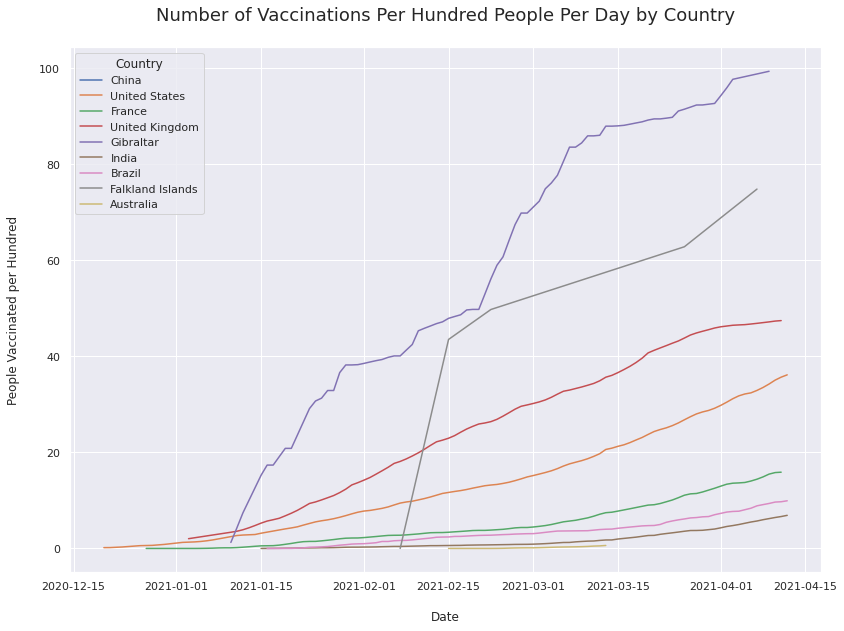

In [53]:
# create a plot using sns

# set style to whitegrid
sns.axes_style("whitegrid")
# set graph size
sns.set(rc={'figure.figsize':(12,9)})

# determine countries to plot
countries = ['United States','United Kingdom','Australia','India','China','France', 'Brazil', 'Gibraltar', 'Falkland Islands']

# create line plot using date on the x axis and number of daily vaccines on y, with data being country that is in the 
#list sorted by date, and coloured by country
graph = sns.lineplot(x="date", y="people_vaccinated_per_hundred", data=vaccination[vaccination['country'].isin(countries)]
                     .sort_values(by="date"), hue='country')

plt.title("Number of Vaccinations Per Hundred People Per Day by Country\n", size=18)
plt.xlabel("\nDate")
plt.ylabel("People Vaccinated per Hundred\n")
plt.legend(title='Country')

# show plot
plt.show()

## Confirmatory Analysis
In order to undertake confirmatory analysis we stated a number of hypothesis' after data cleaning. They were as follows;
1. America has administered the most doses
2. The daily number of vaccinations per country has increased greater than linearly since day 1 of vaccine administration
3. The number of people fully vaccinated lags 3 weeks behind the vaccination numbers due to the wait between first and second dose
4. Smaller populations have vaccinated a higher percentage of their population
5. The two most well know vaccines (Oxford and Pfizer) will be the most popular

A number of these were shown within the exploratory analysis, but others will required further proof.


### 3 Week Lag Between Full Vaccination

In [54]:
# select country 
country1 = vaccination.loc[vaccination['country'] == 'United States']
# take just columns wanted
country1 = country1[['country', 'date', 'people_vaccinated', 'people_fully_vaccinated']]

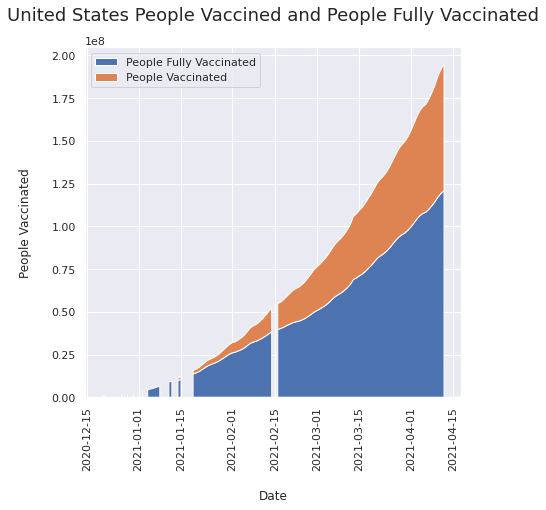

In [55]:
# take the dates and categories to plot
date1 = country1['date']
cats1 = [country1['people_vaccinated'], country1['people_fully_vaccinated']]
 
# set plot size
plt.figure(figsize=(6, 6))

# label plot
plt.xticks(rotation='vertical')
plt.title("United States People Vaccined and People Fully Vaccinated\n", size=18)
plt.xlabel("\nDate")
plt.ylabel("People Vaccinated\n")

# plot
plt.stackplot(date1, cats1, labels=['People Fully Vaccinated','People Vaccinated'])
plt.legend(loc='upper left')
plt.show()


### Smaller populations have vaccinated a higher percentage of their population

In [56]:
# Import vaccination progress, country & population 2020 and country & GDP219 with specific columns
df_vacc_raw = pd.read_csv('data/country_vaccinations.csv', usecols=['country','iso_code','people_vaccinated_per_hundred'])
df_popu_raw = pd.read_csv('data/population_by_country_2020.csv', usecols=['Country (or dependency)','Population (2020)'], dtype={'Population (2020)':str})
df_gdp_raw = pd.read_csv('data/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_2163564.csv', usecols=['Country Code','2019'], dtype={'2019':str})

In [57]:
# Rename columns
df_popu_raw.rename(columns={'Country (or dependency)':'country','Population (2020)':'population'}, inplace=True)
df_gdp_raw.rename(columns={'Country Code':'iso_code','2019':'GDP2019'}, inplace=True)

In [58]:
# Reset index as country column and rename the Czechia index for merge
df_popu_raw.set_index('country', inplace=True)
df_popu_raw.rename(index={'Czech Republic (Czechia)':'Czechia'}, inplace=True)

In [59]:
# Data sorted by max value of the people_vaccinated_per_hundred and then dropped nan values
df_vacc = df_vacc_raw.groupby(['country','iso_code']).max()
df_vacc.dropna(inplace=True)

In [60]:
# Merged vaccination and country & population dataframe
vacc_pop = pd.merge(df_vacc, df_popu_raw, left_index=True, right_index=True, how='left')

# Reset the country as column of the dataframe merged vaccination and population
# merge the vaccination & population dataframe and GDP dataframe baesd on the iso_code
vacc_pop.reset_index(inplace=True)
vacc_pop_GDP = pd.merge(vacc_pop, df_gdp_raw, left_on='iso_code', right_on='iso_code', how='left')

In [61]:
# Dropped nan values
vacc_pop_GDP.dropna(inplace=True)
#vacc_pop_GDP.isnull().sum()
# Changed datatype of population and GDP2019 for analysis
vacc_pop_GDP = vacc_pop_GDP.astype({'population':'float64', 'GDP2019':'float64'})
#vacc_pop_GDP.info()

In [73]:
vacc_pop_GDP = vacc_pop_GDP.sort_values('population').reset_index()
vacc_pop_GDP

,level_0,index,country,iso_code,people_vaccinated_per_hundred,population,GDP2019
0,0,18,Bermuda,BMU,38.200000,62237.000000,7484113000.000000
1,1,37,Dominica,DMA,24.690000,72017.000000,582403703.700000
2,2,2,Andorra,AND,9.190000,77287.000000,3154057987.000000
3,3,5,Antigua and Barbuda,ATG,27.600000,98069.000000,1661962963.000000
4,4,134,Seychelles,SYC,66.600000,98453.000000,1703387387.000000
...,...,...,...,...,...,...,...
131,131,13,Bangladesh,BGD,3.430000,164972348.000000,302571000000.000000
132,132,107,Nigeria,NGA,0.470000,206984347.000000,448120000000.000000
133,133,22,Brazil,BRA,9.920000,212821986.000000,1839760000000.000000
134,134,113,Pakistan,PAK,0.500000,221612785.000000,278222000000.000000


Text(0, 0.5, 'people_vaccinated_per_hundred')

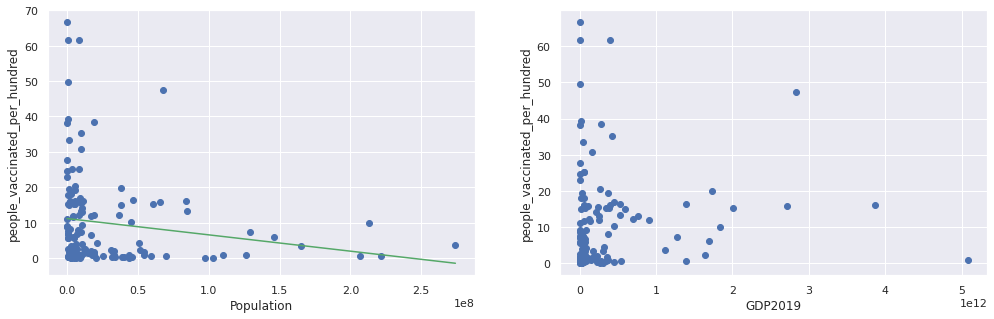

In [75]:
# variables
x = vacc_pop_GDP['population']
x1 =vacc_pop_GDP['GDP2019']
y = vacc_pop_GDP['people_vaccinated_per_hundred']

# get a line of linear regression
slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))

# draw plots
fig = plt.figure(figsize=(15,10))

plt.subplot(221)
plt.scatter(x,y)
plt.plot(x, mymodel, 'g')
plt.xlabel("Population")
plt.ylabel("people_vaccinated_per_hundred")

plt.subplot(222)
plt.scatter(x1,y)
plt.xlabel("GDP2019")
plt.ylabel("people_vaccinated_per_hundred")